In [3]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 69.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 55.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns 

In [8]:
mnist=tf.keras.datasets.mnist

In [9]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [10]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [12]:
# fraction or scale the data 
x_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

X_test=X_test/255

In [13]:
len(X_train_full[5000:])

55000

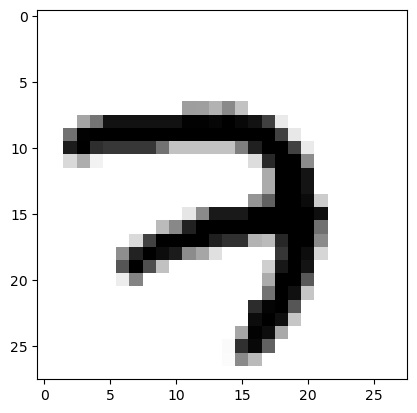

In [14]:
plt.imshow(X_train[0],cmap='binary')
plt.show()

<AxesSubplot: >

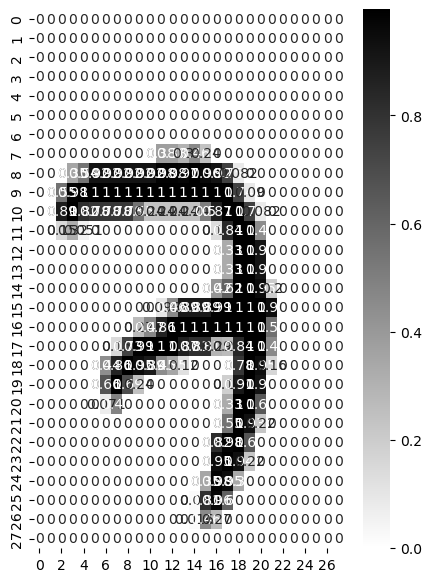

In [16]:
plt.figure(figsize=(5,7))
sns.heatmap(X_train[0],annot=True,cmap='binary')

In [20]:
from keras import regularizers
from keras import activations

In [22]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
    tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax',name='hiddenlayer')
]

model_clf=tf.keras.models.Sequential(LAYERS)

In [23]:
# method 2
from keras import Sequential
from keras.layers import Dense,Flatten
